### HOMEWORK 6

### WARNINGS :

In [1]:
import warnings
warnings.filterwarnings('ignore')

### LIBRARIES :

In [2]:
!pip install Keras-Preprocessing

In [86]:
from collections import Counter

# Helper libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Initializing other libraries:

import keras
import tensorflow as tf
from keras.datasets import cifar10, fashion_mnist
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.constraints import maxnorm
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Reshape, UpSampling2D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras_preprocessing.image import img_to_array, array_to_img
from keras.applications.vgg16 import VGG16
from keras import models, layers
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import SGD
from keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tabulate import tabulate
from prettytable import PrettyTable

### READ THE DATASET :

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
     
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [5]:
# Split train and test

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Explore the data:

In [6]:
# Pregled na shape-ovite

print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)
print("Number of classes:", len(set(train_labels)))

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10


In [37]:
# Mapiranje na labelite 

class_mapping = { 0: "T-shirt/top",1: "Trouser",2: "Pullover",3: "Dress",4: "Coat",5: "Sandal",6: "Shirt",7: "Sneaker",8: "Bag",9: "Ankle boot"}

for label, class_name in class_mapping.items():
    print(f"Class Label: {label} - Class Name: {class_name}")

Class Label: 0 - Class Name: T-shirt/top
Class Label: 1 - Class Name: Trouser
Class Label: 2 - Class Name: Pullover
Class Label: 3 - Class Name: Dress
Class Label: 4 - Class Name: Coat
Class Label: 5 - Class Name: Sandal
Class Label: 6 - Class Name: Shirt
Class Label: 7 - Class Name: Sneaker
Class Label: 8 - Class Name: Bag
Class Label: 9 - Class Name: Ankle boot


In [8]:
# Proverka

class_mapping

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [9]:
# Pravime proverka so assert dali ni se tocni train podatocite

train_length = 60000
assert len(train_labels) == train_length

In [10]:
# Pravime proverka vo test podatocite, labelite

print(test_labels)
sorted_labels = sorted(test_labels)
print(Counter(sorted_labels))
n_classes = len(Counter(sorted_labels))
print(n_classes)

[9 2 1 ... 8 1 5]
Counter({0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000})
10


### Plot :

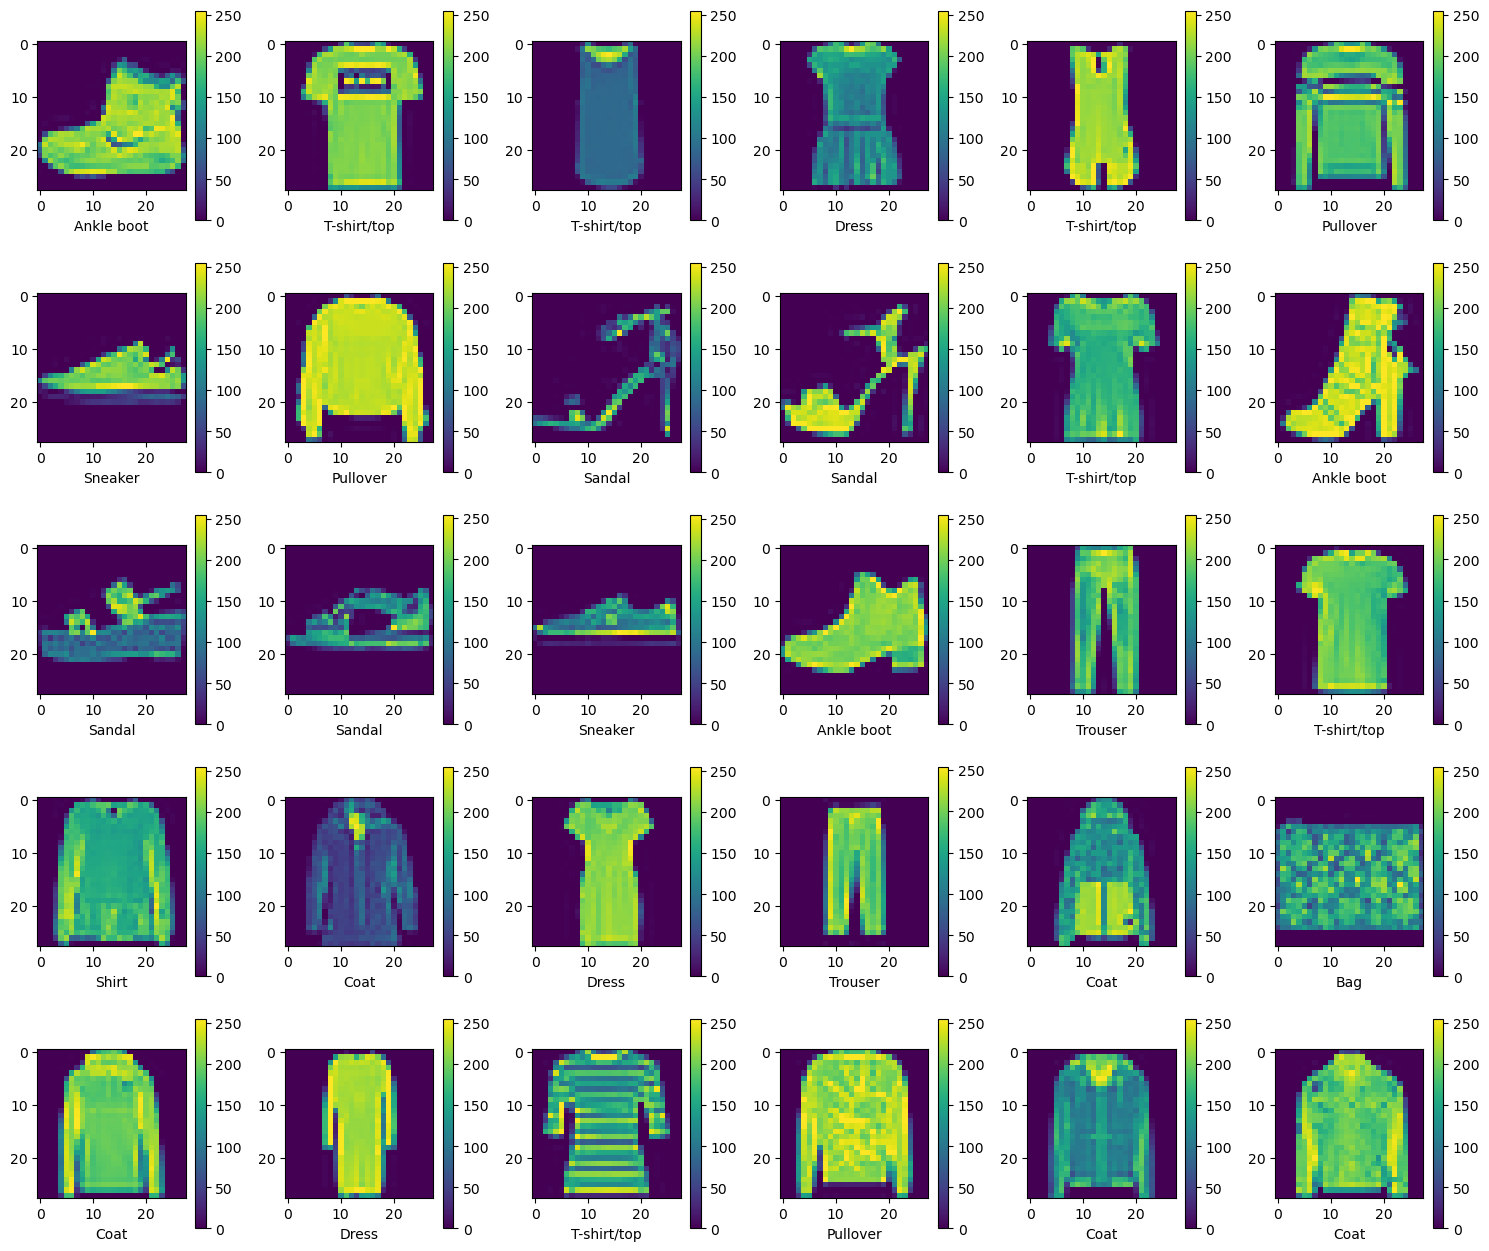

In [11]:
# Pravam plot na 30 sliki od data setot, cisto za proverka, da vidam sto imam
# probav podole otkako gi normalizirav podatocite, da go napravam plotot na train_images_scal, megutoa nemase razlika

plt.figure(figsize=(15, 15))
for i in range(30): 
    plt.subplot(6, 6, i+1)
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.xlabel(class_mapping[train_labels[i]])
plt.tight_layout()
plt.show()

### Scaling:

In [12]:
# Za podobro da ni raboti mrezata, potrebno e da se normaliziraat podatocite 
# eden od nacinite za normaliziranje e so presmetuvanje na std i mean

mean = np.mean(train_images)
std = np.std(train_images)

# Tuka gi normaliziram vrednostite na pikselite 
train_images_scal = (train_images - mean) / std
test_images_scal = (test_images - mean) / std

print("Mean-train:", np.mean(train_images_scal))
print("Standard Deviation-train:", np.std(train_images_scal))  
print('-------------------------------------------------------') 
print("Mean-test:", np.mean(test_images_scal))
print("Standard Deviation-test:", np.std(test_images_scal))

Mean-train: -1.74808013869143e-17
Standard Deviation-train: 1.0
-------------------------------------------------------
Mean-test: 0.0022907314045826303
Standard Deviation-test: 0.9983567948193489


In [13]:
train_images_scal

array([[[-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766],
        [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766],
        [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766],
        ...,
        [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766],
        [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766],
        [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766]],

       [[-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766],
        [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766],
        [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766],
        ...,
        [-0.81025766, -0.81025766, -0.81025766, ..., -

In [14]:
test_images_scal

array([[[-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766],
        [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766],
        [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766],
        ...,
        [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766],
        [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766],
        [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766]],

       [[-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766],
        [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766],
        [-0.81025766, -0.81025766, -0.81025766, ..., -0.81025766,
         -0.81025766, -0.81025766],
        ...,
        [-0.81025766, -0.81025766, -0.81025766, ..., -

### Reshape na Train and Test images : 

In [15]:
# Pravime reshape na vleznite podatoci co cel podobro da ni raboti cnn mrezata  

# Reshape train images
train_images_reshaped = train_images_scal.reshape(train_images_scal.shape[0], 28, 28, 1)

# Reshape test images
test_images_reshaped = test_images_scal.reshape(test_images_scal.shape[0], 28, 28, 1)

print("Train images shape:", train_images_reshaped.shape)
print("Test images shape:", test_images_reshaped.shape)

Train images shape: (60000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)


### One-hot encoding :

In [16]:
# Pravam reshape i na labels za da bidat vo 2D niza

train_labels_r = train_labels.reshape(-1, 1)
test_labels_r = test_labels.reshape(-1, 1)

encoder = OneHotEncoder()

train_labels_encoded = encoder.fit_transform(train_labels_r).toarray()

test_labels_encoded = encoder.transform(test_labels_r).toarray()

print('Old value train',train_labels,'\nNew value train',train_labels_encoded)
print('Old value test',test_labels,'\nNew value test',test_labels_encoded)

Old value train [9 0 0 ... 3 0 5] 
New value train [[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Old value test [9 2 1 ... 8 1 5] 
New value test [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Create a model with 3 CNN layers.

### - The first layer is a 2D Convolution with RELU activation function, kernel size 2x2, and 32 kernels/filters.
### - The second layer is a 2D Convolution with RELU activation function, kernel size 3x3, and 32 kernels/filters. 
### It is followed by a MaxPooling layer with size 2x2. Then there is a dropout layer with rate - 25% - chance of dropout.
### - The third layer is a 2D Convolution with RELU activation function, kernel size 3x3, and 32 kernels/filters. 
### It is followed by a MaxPooling layer with size 2x2. Then there is a dropout layer with rate - 35% - chance of dropout.

### The final layers, are: Flatten layer; then Dense layer with 128 nodes; then 10-node softmax layer.

In [17]:
model = Sequential()

# Input block
model.add(Input((28, 28, 1)))
model.add(BatchNormalization())

# First CNN layer
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())

# Second CNN layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third CNN layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Flattening layer
model.add(Flatten())

# Dense layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        9248      
                                                                 
 batch_normalization_2 (Batc  (None, 25, 25, 32)       128       
 hNormalization)                                                 
                                                        

### Compile the model with (optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
### sgd: 
### - 0.02 learning_rate 
### - decay = learning_rate/10
### - momentum = 0.91

In [18]:
learning_rate = 0.02 # kolkav e cekorot vrz parametrite spored gradientot
epochs = 10
decay = learning_rate / epochs # se misli na namaluvanje na learning rate , so tek na vremeto
momentum = 0.91 # gi kontrolira prethodnite korekcii na parametrite pri naredno izvrsuvanje

optimizer = optimizers.SGD(learning_rate=learning_rate, decay=decay, momentum=momentum)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Setting the model:

### ModelCheckpoint monitoring:

In [19]:
checkpoint_path = '/content/drive/My Drive/Colab Notebook'

checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)

### Train the model with 10 epochs :

In [21]:
# Train model (train)

model_history_t = model.fit(train_images_reshaped, train_labels_r ,epochs=10,verbose=1,validation_data=(test_images_reshaped, test_labels_r), callbacks=[checkpoint])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3455 - accuracy: 0.8731
Epoch 1: val_loss improved from inf to 0.30893, saving model to /content/drive/My Drive\Colab Notebook
1875/1875 [==============================] - 137s 73ms/step - loss: 0.3455 - accuracy: 0.8731 - val_loss: 0.3089 - val_accuracy: 0.8889
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3114 - accuracy: 0.8855
Epoch 2: val_loss improved from 0.30893 to 0.30309, saving model to /content/drive/My Drive\Colab Notebook
1875/1875 [==============================] - 126s 67ms/step - loss: 0.3114 - accuracy: 0.8855 - val_loss: 0.3031 - val_accuracy: 0.8876
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2951 - accuracy: 0.8903
Epoch 3: val_loss improved from 0.30309 to 0.30066, saving model to /content/drive/My Drive\Colab Notebook
1875/1875 [==============================] - 127s 68ms/step - loss: 0.2951 - accuracy: 0.8903 - val_loss: 0.3007 - va

### Report Table - Train : 

In [22]:
# Report table - Train

epoch_data = []

for epoch in range(len(model_history_t.history['accuracy'])):
    data = {'Epoch': epoch + 1,
            'Train Accuracy': model_history_t.history['accuracy'][epoch],
            'Validation Accuracy': model_history_t.history['val_accuracy'][epoch],
            'Loss': model_history_t.history['loss'][epoch],
            'Val Loss': model_history_t.history['val_loss'][epoch]}
    epoch_data.append(data)

epoch_data = sorted(epoch_data, key=lambda x: x['Train Accuracy'], reverse=True)

table = tabulate(epoch_data, headers="keys", tablefmt='pipe')

print(table)

|   Epoch |   Train Accuracy |   Validation Accuracy |     Loss |   Val Loss |
|--------:|-----------------:|----------------------:|---------:|-----------:|
|       8 |         0.904683 |                0.9043 | 0.259569 |   0.260505 |
|       9 |         0.90445  |                0.9055 | 0.256522 |   0.255933 |
|      10 |         0.904333 |                0.9064 | 0.255554 |   0.253412 |
|       7 |         0.901983 |                0.9044 | 0.26325  |   0.262867 |
|       5 |         0.898517 |                0.9006 | 0.276609 |   0.279292 |
|       6 |         0.89825  |                0.9045 | 0.27131  |   0.262358 |
|       4 |         0.89365  |                0.9007 | 0.284365 |   0.272786 |
|       3 |         0.890317 |                0.8905 | 0.295105 |   0.300665 |
|       2 |         0.885517 |                0.8876 | 0.311359 |   0.303091 |
|       1 |         0.873133 |                0.8889 | 0.345463 |   0.308929 |


### Split the data (train and valid) :

In [23]:
# Split the data (train and valid)
train_images, val_images, train_labels, val_labels = train_test_split(train_images_reshaped, train_labels_r, test_size=0.2, random_state=42)

# Train the model (train and valid)
model_history_v = model.fit(train_images_reshaped, train_labels_r, epochs=10,verbose=1, validation_data=(val_images, val_labels), callbacks=[checkpoint])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2507 - accuracy: 0.9067
Epoch 1: val_loss improved from 0.25341 to 0.21287, saving model to /content/drive/My Drive\Colab Notebook
1875/1875 [==============================] - 127s 68ms/step - loss: 0.2507 - accuracy: 0.9067 - val_loss: 0.2129 - val_accuracy: 0.9212
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2506 - accuracy: 0.9073
Epoch 2: val_loss improved from 0.21287 to 0.20717, saving model to /content/drive/My Drive\Colab Notebook
1875/1875 [==============================] - 129s 69ms/step - loss: 0.2506 - accuracy: 0.9073 - val_loss: 0.2072 - val_accuracy: 0.9221
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2471 - accuracy: 0.9082
Epoch 3: val_loss improved from 0.20717 to 0.20689, saving model to /content/drive/My Drive\Colab Notebook
1875/1875 [==============================] - 124s 66ms/step - loss: 0.2471 - accuracy: 0.9082 - val_loss: 0.2069 

### Report Table - Valid : 

In [24]:
# Report table Valid

epoch_data = []

for epoch in range(len(model_history_v.history['val_accuracy'])):
    data = {'Epoch': epoch + 1,
            'Validation Accuracy': model_history_v.history['val_accuracy'][epoch],
            'Train Accuracy': model_history_v.history['accuracy'][epoch],
            'Loss': model_history_v.history['loss'][epoch],
            'Val Loss': model_history_v.history['val_loss'][epoch]}
    epoch_data.append(data)

epoch_data = sorted(epoch_data, key=lambda x: x['Validation Accuracy'], reverse=True)

table = tabulate(epoch_data, headers="keys", tablefmt='pipe')

print(table)

|   Epoch |   Validation Accuracy |   Train Accuracy |     Loss |   Val Loss |
|--------:|----------------------:|-----------------:|---------:|-----------:|
|      10 |              0.926667 |         0.912167 | 0.235707 |   0.197348 |
|       9 |              0.926333 |         0.91145  | 0.236636 |   0.197544 |
|       7 |              0.925167 |         0.910233 | 0.240396 |   0.199493 |
|       6 |              0.925083 |         0.910817 | 0.242095 |   0.200943 |
|       5 |              0.923667 |         0.909717 | 0.243961 |   0.205071 |
|       8 |              0.923417 |         0.9107   | 0.239388 |   0.201309 |
|       4 |              0.92325  |         0.90835  | 0.245749 |   0.20465  |
|       3 |              0.922417 |         0.908167 | 0.247095 |   0.206887 |
|       2 |              0.922083 |         0.907317 | 0.250614 |   0.207169 |
|       1 |              0.921167 |         0.9067   | 0.25069  |   0.21287  |


### Final evaluation of the model:

In [25]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images_reshaped, test_labels_r, verbose=1)

print('Final evaluation of the model:')
print('Test accuracy:', test_accuracy)
print('Test loss:',test_loss)

313/313 [==============================] - 3s 11ms/step - loss: 0.2417 - accuracy: 0.9122
Final evaluation of the model:
Test accuracy: 0.9121999740600586
Test loss: 0.24167795479297638


### Making predictions with the model:

In [26]:
predictions = model.predict(test_images_reshaped)

313/313 [==============================] - 7s 14ms/step


In [27]:
predicted_labels = np.argmax(predictions, axis=1)
print(len(predicted_labels))

10000


### Show the predictions for image 10 and also print the test label and compare them:

313/313 [==============================] - 5s 15ms/step


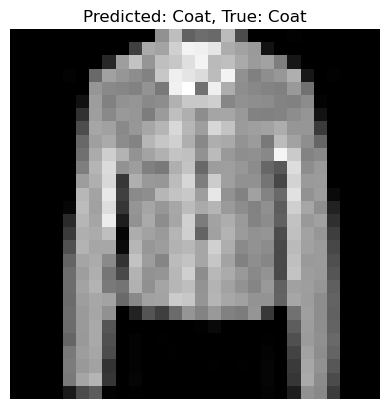

In [28]:
predictions = model.predict(test_images_reshaped)

# Predict label for image 10
predicted_label = np.argmax(predictions[10])

# True label for image 10
true_label = test_labels[10]

# Plot for predicted and true labels
plt.imshow(test_images[10], cmap='gray')
plt.title('Predicted: {}, True: {}'.format(class_mapping[predicted_label], class_mapping [true_label]))
plt.axis('off')
plt.show()

In [30]:
predicted_label = np.argmax(predictions[10])
predicted_label, class_mapping[predicted_label ]

(4, 'Coat')

### Plot the prediction for image 17 (show the image, the predicted class and the percentage in a bar chart)

### Visualizing the prediction for image 17 with prediction array:

1/1 [==============================] - 0s 23ms/step


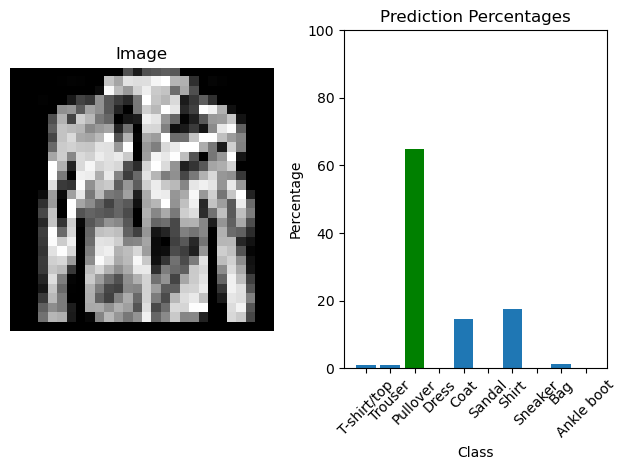

In [39]:
class_mapping = { 0: "T-shirt/top",1: "Trouser",2: "Pullover",3: "Dress",4: "Coat",5: "Sandal",6: "Shirt",7: "Sneaker",8: "Bag",9: "Ankle boot"}

# Image 17 - test
image_index = 17
image = test_images[image_index]
true_label = test_labels[image_index]

# Preprocess the image for prediction
image = image.reshape(1, 28, 28, 1)
image = image.astype('float32') / 255.0

# Predictions - image (label and class)
predictions = model.predict(image)
predicted_label = np.argmax(predictions)
predicted_class = class_mapping[predicted_label]

# Prediction percentages for each class
prediction_percentages = predictions[0] * 100

# Plot
plt.subplot(1, 2, 1)
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title('Image')
plt.axis('off')

# Plot prediction percentages (bar chart)
plt.subplot(1, 2, 2)
plt.bar(class_mapping.values(), prediction_percentages)
plt.title('Prediction Percentages')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.ylim([0, 100])

# Predicted class in green
highlight_index =predicted_label
plt.bar(class_mapping[highlight_index], prediction_percentages[highlight_index], color='green')

plt.tight_layout()
plt.show()

### Plot the first 25 test images (5x5), their predicted labels, and the true labels.
### Color correct predictions in blue and incorrect predictions in red.

1/1 [==============================] - 0s 195ms/step


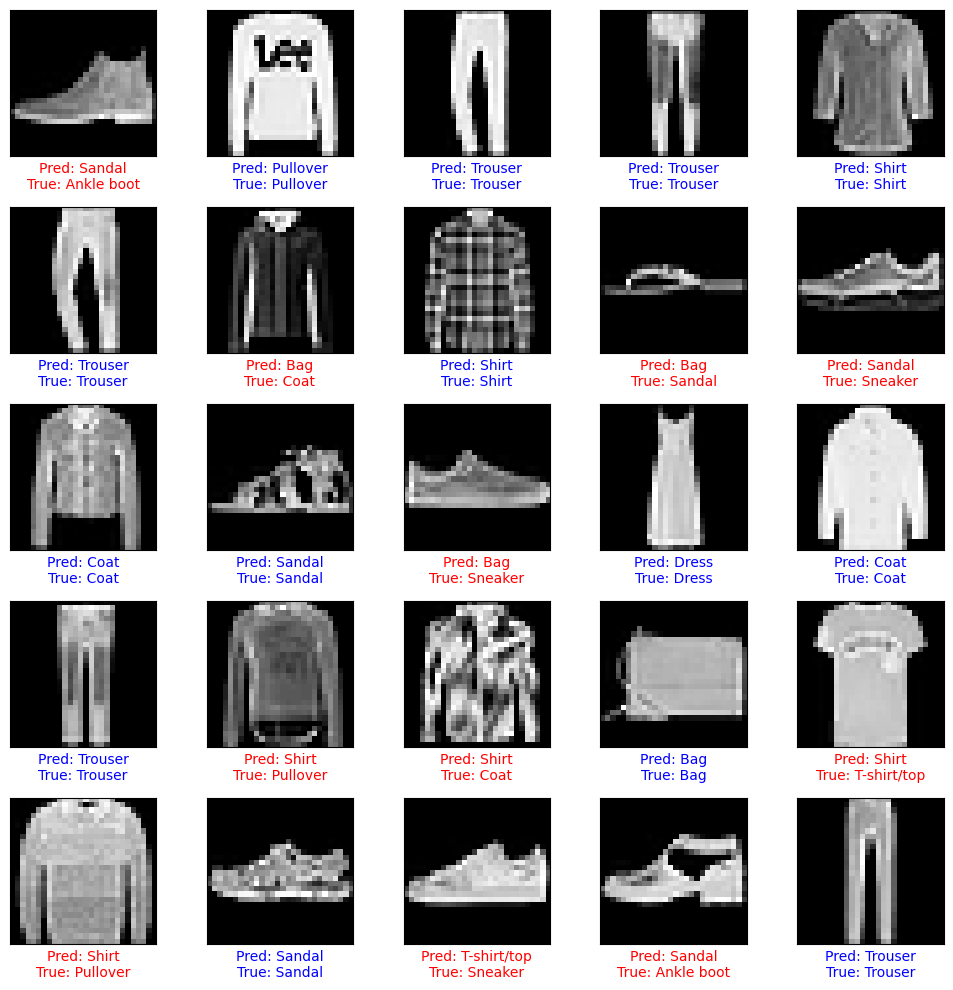

In [40]:
# First 25 images - test
num_images = 25
x_test_num = test_images[:num_images]
y_test_num = test_labels[:num_images]

# Predictions - image
predictions = model.predict(x_test_num)
predicted_label = np.argmax(predictions, axis=1)

# Plot images, predicted label, and true labels
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test_num[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    if predicted_label[i] == y_test_num[i]:
        color= 'blue' 
    else:
        color = 'red' 
    plt.xlabel(f'Pred: {class_mapping[predicted_label[i]]}\nTrue: {class_mapping[y_test_num[i]]}', color=color)

plt.tight_layout()
plt.show()

### Use the model to predict the class for image 20 from the test set. Present the predictions for each class, and print the test label        
### Grab an image from the test dataset:

1/1 [==============================] - 0s 21ms/step
Predictions for each class:
   Class         Score
2    2.0  8.784370e-01
0    0.0  8.885053e-02
6    6.0  2.916951e-02
8    8.0  3.140311e-03
1    1.0  2.332349e-04
3    3.0  1.504625e-04
4    4.0  1.368511e-05
9    9.0  3.983444e-06
7    7.0  1.274896e-06
5    5.0  5.815226e-08
Best prediction:
Class: 2.0
Score: 0.8784370422363281


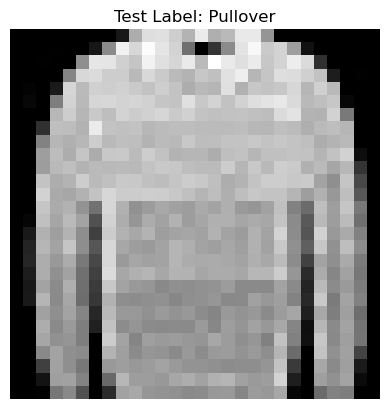

In [44]:
# Image 20 - test
image_index = 20
image = test_images[image_index]
true_label = test_labels[image_index]

# Preprocess image for prediction
image = image.reshape(1, 28, 28, 1)
image = image.astype('float32') / 255.0

# Predictions - image
predictions = model.predict(image)

# Predicted class label with class name
predicted_label = np.argmax(predictions)

predicted_class = class_mapping[predicted_label]
true_class = class_mapping[true_label]

# Log report
log_report = pd.DataFrame(columns=['Class', 'Score'])

for i, class_name in enumerate(class_mapping):
    score = predictions[0][i]
    class_data = {'Class': class_name, 'Score': score}
    log_report = log_report.append(class_data, ignore_index=True)

log_report = log_report.sort_values(by='Score', ascending=False)

print("Predictions for each class:")
print(log_report)

# Print class with best score
best_class = log_report.iloc[0]['Class']
best_score = log_report.iloc[0]['Score']
print("Best prediction:")
print(f"Class: {best_class}")
print(f"Score: {best_score}")

# Plot test label
plt.imshow(test_images[image_index], cmap='gray')
plt.title(f"Test Label: {true_class}")
plt.axis('off')
plt.show()

### Add the image to a batch where it's the only member:

Representing a single image and its label within a batch
Batch shape:
(1, 28, 28)
Label:
[4]


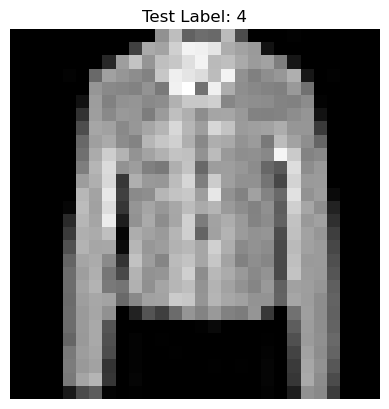

In [45]:
# Image 10 - test
image_index = 10
image = test_images[image_index]
label = test_labels[image_index]

# Add the image to a batch where it's the only member
batch_images = np.expand_dims(image, axis=0)  # od (28, 28, 1) ja menuva vo (1, 28, 28, 1)
batch_labels = np.array([label])

# Shape of batch
print ("Representing a single image and its label within a batch")
print("Batch shape:")
print(batch_images.shape) 

print("Label:")
print(batch_labels)

# Plot
plt.imshow(image, cmap='gray')
plt.title(f"Test Label: {label}")
plt.axis('off')
plt.show()

# Ova ja obrabotuva slikata vo batch format, co cel da se oddrzi ocekuvaniot input format na modeot

### Prediction for a single image:

In [53]:
# Index image
image_index = 8
image = test_images[image_index]

# Preprocess image for prediction
image = image.reshape(1, 28, 28, 1)
image = image.astype('float32') / 255.0

# Prediction
predictions = model.predict(image)
print(predictions)

1/1 [==============================] - 0s 20ms/step
[[3.7324733e-01 3.2050852e-04 7.0627439e-03 3.1043828e-04 4.8069444e-07
  6.5768504e-06 9.8027913e-03 1.8689348e-03 6.0580844e-01 1.5717086e-03]]


### Visualization for that signle image:

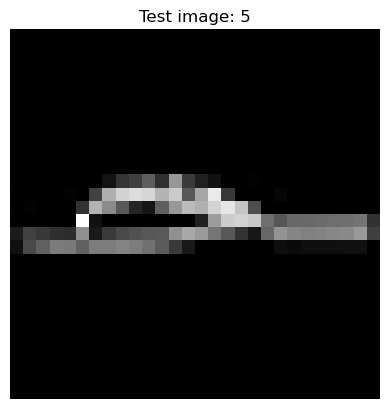

In [55]:
# Index image
image_index = 8

# Plot image
plt.imshow(test_images[image_index], cmap='gray')
plt.title(f"Test image: {test_labels[image_index]}")
plt.axis('off')

plt.show()

### Using argmax on the signle image:

In [57]:
# Index image 
image_index = 8
image = test_images[image_index]

# Argmax on image
max_value = np.argmax(predictions) # go naoga indeksot na max.vrednost vo nizata-slikata

# Print index with maximum value
print("Index of the maximum value:", max_value)

Index of the maximum value: 8


### Comparing with the test_labels:

In [60]:
# Index image 
image_index = 8
image = test_images[image_index]

# Argmax on image
max_value = np.argmax(predictions)

# Label from test
true_label = test_labels[image_index]

# Print index with maximum value and true label
print("Index of the maximum value:", max_value)
print("True label:", true_label)

Index of the maximum value: 8
True label: 5


### Plot a confusion matrix
### Defining function for Confusion Martix and Classification Report:

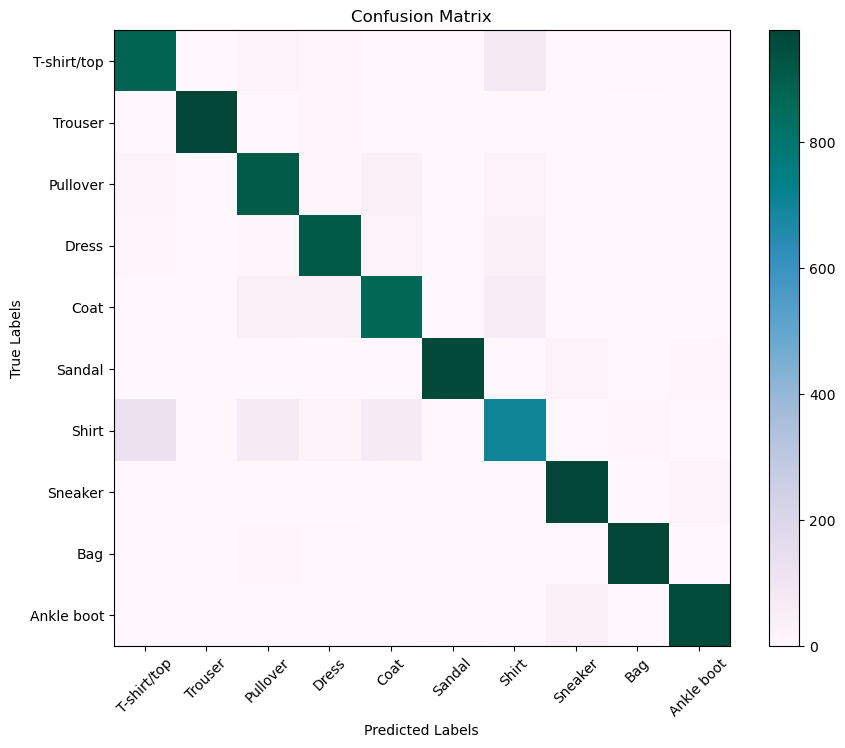

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.88      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.91      0.88      1000
       Dress       0.90      0.91      0.91      1000
        Coat       0.87      0.86      0.87      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.78      0.70      0.74      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [61]:
class_mapping = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Kreiranje na confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=range(len(class_mapping)), labels=class_mapping, rotation=45)
plt.yticks(ticks=range(len(class_mapping)), labels=class_mapping)
plt.imshow(cm, interpolation='nearest', cmap='PuBuGn')
plt.colorbar()
plt.show()

report = classification_report(test_labels, predicted_labels, target_names=class_mapping)
print(report)

### Evaluating 'best_model_second.pt':

In [62]:
# Istoto od pogore

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images_reshaped, test_labels_r, verbose=0)

print('Final evaluation of the model:')
print('Test accuracy:', test_accuracy)
print('Test loss:',test_loss)

Final evaluation of the model:
Test accuracy: 0.9121999740600586
Test loss: 0.24167795479297638


### Plot a train vs validation accuracy graph along the epochs
### Visualizing the learning curves on both models:

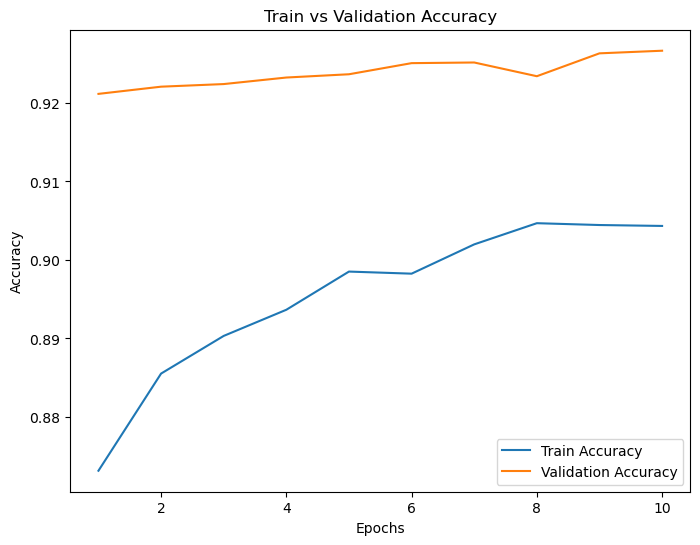

In [63]:
# Train vs Valid

def plot_accuracy(model_history_t):
    train_acc = model_history_t.history['accuracy']
    val_acc = model_history_v.history['val_accuracy']
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(model_history_t)

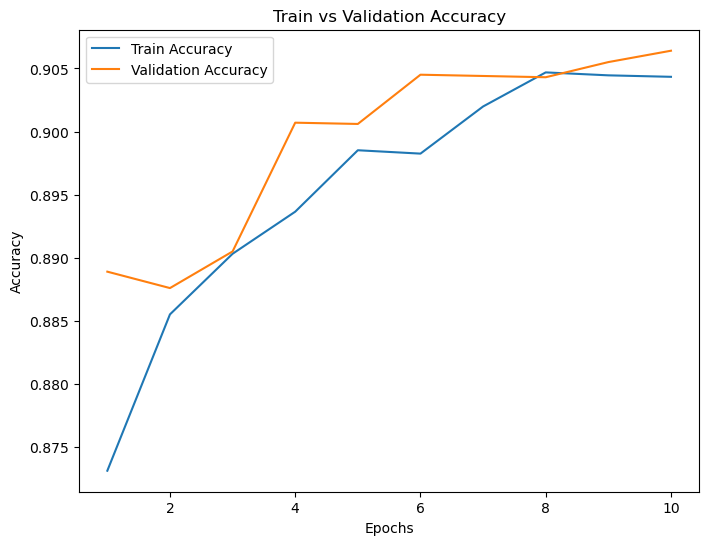

In [64]:
# Train

def plot_accuracy(model_history_t):
    train_acc = model_history_t.history['accuracy']
    val_acc = model_history_t.history['val_accuracy']
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(model_history_t)

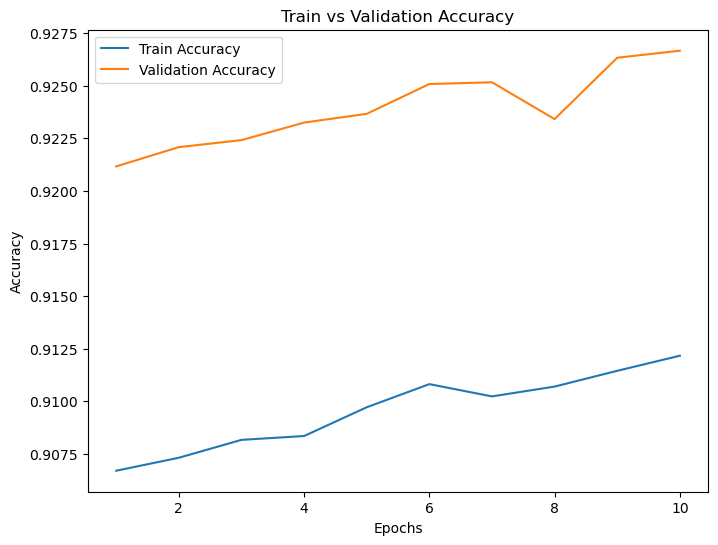

In [65]:
# Valid

def plot_accuracy(model_history_v):
    train_acc = model_history_v.history['accuracy']
    val_acc = model_history_v.history['val_accuracy']
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(model_history_v)

### Optional - The Best model:

### Try different networks and parameters and create the most accurate model.

### TODO: ADD VALIDATION CURVE

### READ NEW DATASET :

In [66]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


### Scaling:

In [67]:
X_train_p = X_train.reshape(*X_train.shape, 1) # TO ADD CHANNEL, because B&W has only 1
X_test_p = X_test.reshape(*X_test.shape, 1) 

X_train_p = X_train_p.astype('float32')/255.0
X_test_p = X_test_p.astype('float32')/255.0

### One-hot encoding :

In [68]:
n_classes = len(set(y_train))
y_train_oh = np_utils.to_categorical(y_train, num_classes=n_classes)
y_test_oh = np_utils.to_categorical(y_test, num_classes=n_classes)

### Create a model with CNN layers: 

In [69]:
model = Sequential()

model.add(Conv2D(filters =32,kernel_size= (3, 3), strides=(1,1), activation = 'relu', padding='same',input_shape=(28, 28, 1)))  
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64,kernel_size=(3, 3),strides=(1,1), activation = 'relu', padding='same'))
model.add(BatchNormalization()) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Fully connected layers 128 units
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units=10, activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 14, 14, 64)      

### Compile the model: 

In [70]:
learning_rate=0.001
beta_1=0.9
epsilon=1e-07

optimizer = keras.optimizers.Adam(learning_rate=learning_rate,beta_1=beta_1,epsilon=epsilon)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### ModelCheckpoint monitoring:

In [71]:
checkpoint_path2 = '/content/drive/My Drive/Colab Notebook'

checkpoint2 = ModelCheckpoint(checkpoint_path2, monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)

### Train the model:

In [73]:
# Train model

model_history_tnew = model.fit(X_train_p, y_train_oh ,epochs=5,batch_size=3,verbose=1,validation_data=(X_test_p, y_test_oh), callbacks=[checkpoint2])

Epoch 1/5
19998/20000 [============================>.] - ETA: 0s - loss: 0.5593 - accuracy: 0.8379
Epoch 1: val_loss improved from inf to 0.05597, saving model to /content/drive/My Drive\Colab Notebook
20000/20000 [==============================] - 233s 12ms/step - loss: 0.5592 - accuracy: 0.8379 - val_loss: 0.0560 - val_accuracy: 0.9822
Epoch 2/5
19997/20000 [============================>.] - ETA: 0s - loss: 0.4075 - accuracy: 0.8905
Epoch 2: val_loss did not improve from 0.05597
20000/20000 [==============================] - 253s 13ms/step - loss: 0.4075 - accuracy: 0.8905 - val_loss: 0.0580 - val_accuracy: 0.9822
Epoch 3/5
19993/20000 [============================>.] - ETA: 0s - loss: 0.3538 - accuracy: 0.9068
Epoch 3: val_loss improved from 0.05597 to 0.03876, saving model to /content/drive/My Drive\Colab Notebook
20000/20000 [==============================] - 239s 12ms/step - loss: 0.3538 - accuracy: 0.9068 - val_loss: 0.0388 - val_accuracy: 0.9877
Epoch 4/5
19997/20000 [=========

### Report Table -Train : 

In [74]:
# Report table - Train

epoch_data = []

for epoch in range(len(model_history_tnew.history['accuracy'])):
    data = {'Epoch': epoch + 1,
            'Train Accuracy': model_history_tnew.history['accuracy'][epoch],
            'Validation Accuracy': model_history_tnew.history['val_accuracy'][epoch],
            'Loss': model_history_tnew.history['loss'][epoch],
            'Val Loss': model_history_tnew.history['val_loss'][epoch]}
    epoch_data.append(data)

epoch_data = sorted(epoch_data, key=lambda x: x['Train Accuracy'], reverse=True)

table = tabulate(epoch_data, headers="keys", tablefmt='pipe')

print(table)

|   Epoch |   Train Accuracy |   Validation Accuracy |     Loss |   Val Loss |
|--------:|-----------------:|----------------------:|---------:|-----------:|
|       5 |         0.919433 |                0.9875 | 0.314592 |  0.0390701 |
|       4 |         0.91275  |                0.9861 | 0.335154 |  0.0429545 |
|       3 |         0.906833 |                0.9877 | 0.353772 |  0.0387618 |
|       2 |         0.890533 |                0.9822 | 0.407453 |  0.0579774 |
|       1 |         0.837917 |                0.9822 | 0.559222 |  0.0559699 |


### Split the data (train and valid) :

In [75]:
# Split the data (train and valid)
X_train, X_val, y_train, y_val = train_test_split(X_train_p, y_train_oh, test_size=0.2, random_state=42)

# Train the model (train and valid)
model_history_vnew = model.fit(X_train_p, y_train_oh, epochs=5,batch_size=3,verbose=1, validation_data=(X_val,y_val), callbacks=[checkpoint2])

Epoch 1/5
19997/20000 [============================>.] - ETA: 0s - loss: 0.2990 - accuracy: 0.9234
Epoch 1: val_loss improved from 0.03876 to 0.03184, saving model to /content/drive/My Drive\Colab Notebook
20000/20000 [==============================] - 266s 13ms/step - loss: 0.2990 - accuracy: 0.9234 - val_loss: 0.0318 - val_accuracy: 0.9909
Epoch 2/5
20000/20000 [==============================] - ETA: 0s - loss: 0.2914 - accuracy: 0.9260
Epoch 2: val_loss improved from 0.03184 to 0.02963, saving model to /content/drive/My Drive\Colab Notebook
20000/20000 [==============================] - 255s 13ms/step - loss: 0.2914 - accuracy: 0.9260 - val_loss: 0.0296 - val_accuracy: 0.9907
Epoch 3/5
20000/20000 [==============================] - ETA: 0s - loss: 0.2811 - accuracy: 0.9300
Epoch 3: val_loss improved from 0.02963 to 0.02850, saving model to /content/drive/My Drive\Colab Notebook
20000/20000 [==============================] - 203s 10ms/step - loss: 0.2811 - accuracy: 0.9300 - val_loss

### Report Table - Valid : 

In [76]:
# Report table Valid

epoch_data = []

for epoch in range(len(model_history_vnew.history['val_accuracy'])):
    data = {'Epoch': epoch + 1,
            'Validation Accuracy': model_history_vnew.history['val_accuracy'][epoch],
            'Train Accuracy': model_history_vnew.history['accuracy'][epoch],
            'Loss': model_history_vnew.history['loss'][epoch],
            'Val Loss': model_history_vnew.history['val_loss'][epoch]}
    epoch_data.append(data)

epoch_data = sorted(epoch_data, key=lambda x: x['Validation Accuracy'], reverse=True)

table = tabulate(epoch_data, headers="keys", tablefmt='pipe')

print(table)

|   Epoch |   Validation Accuracy |   Train Accuracy |     Loss |   Val Loss |
|--------:|----------------------:|-----------------:|---------:|-----------:|
|       4 |              0.991917 |         0.931717 | 0.274575 |  0.027042  |
|       3 |              0.991417 |         0.930017 | 0.28114  |  0.0284999 |
|       5 |              0.991417 |         0.934283 | 0.268581 |  0.0276434 |
|       1 |              0.990917 |         0.9234   | 0.299025 |  0.0318357 |
|       2 |              0.990667 |         0.926033 | 0.291404 |  0.0296311 |


### Final evaluation of the model:

In [77]:
# Evaluate the model on the test set
test_loss1, test_accuracy1 = model.evaluate(X_test_p, y_test_oh, verbose=0)

print('Final evaluation of the model:')
print('Test accuracy:', test_accuracy1)
print('Test loss:',test_loss1)

Final evaluation of the model:
Test accuracy: 0.9914000034332275
Test loss: 0.029729915782809258


### Making predictions with the model:

In [78]:
predictions1 = model.predict(X_test_p)

313/313 [==============================] - 3s 10ms/step


In [79]:
predicted_labels1 = np.argmax(predictions1, axis=1)
print(len(predicted_labels1))

10000


### Confusion Martix and Classification Report:

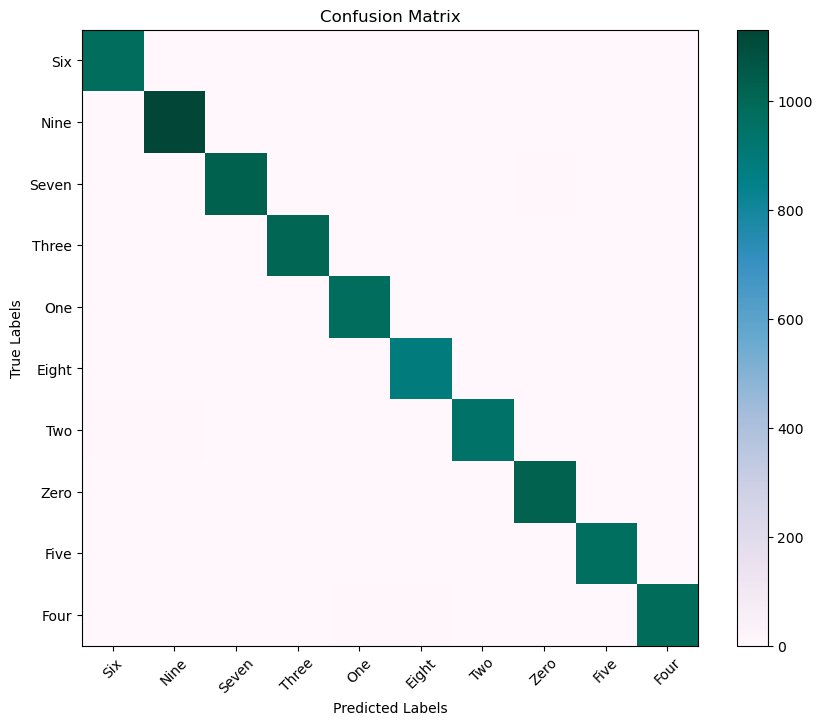

              precision    recall  f1-score   support

         Six       0.99      1.00      0.99       980
        Nine       0.99      1.00      0.99      1135
       Seven       0.99      0.99      0.99      1032
       Three       1.00      0.99      1.00      1010
         One       0.99      0.99      0.99       982
       Eight       0.99      0.99      0.99       892
         Two       1.00      0.99      0.99       958
        Zero       0.99      0.99      0.99      1028
        Five       0.99      0.99      0.99       974
        Four       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [80]:
class_mapping1 = {"Zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine"}

# Kreiranje na confusion matrix
cm = confusion_matrix(y_test, predicted_labels1)
plt.figure(figsize=(10, 8))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=range(len(class_mapping1)), labels=class_mapping1, rotation=45)
plt.yticks(ticks=range(len(class_mapping1)), labels=class_mapping1)
plt.imshow(cm, interpolation='nearest', cmap='PuBuGn')
plt.colorbar()
plt.show()

report = classification_report(y_test, predicted_labels1, target_names=class_mapping1)
print(report)

### TRAIN AND VALIDATION CURVE

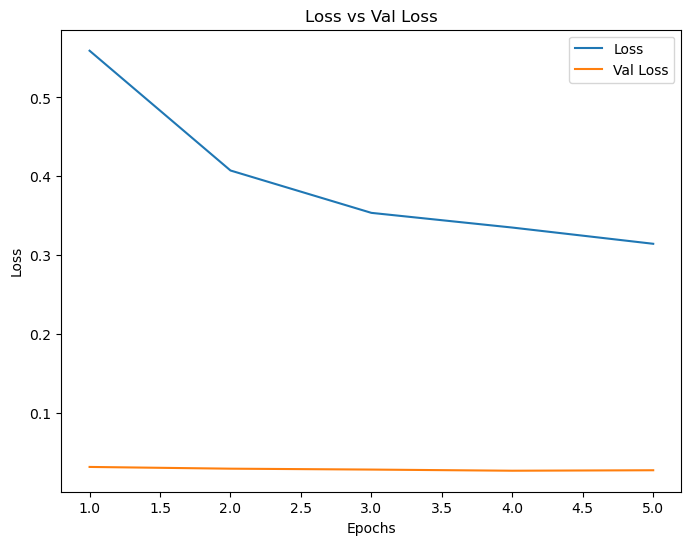

In [81]:
# Train and Valid

def plot_accuracy(model_history_tnew):
    train_loss = model_history_tnew.history['loss']
    val_loss = model_history_vnew.history['val_loss']
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_loss, label='Loss')
    plt.plot(epochs, val_loss, label='Val Loss')
    plt.title('Loss vs Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_accuracy(model_history_tnew)

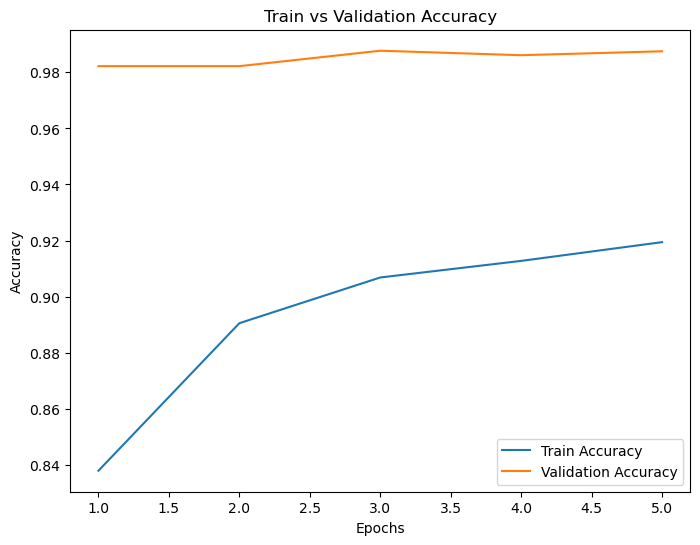

In [83]:
# Train

def plot_accuracy(model_history_tnew):
    train_acc = model_history_tnew.history['accuracy']
    val_acc = model_history_tnew.history['val_accuracy']
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(model_history_tnew)

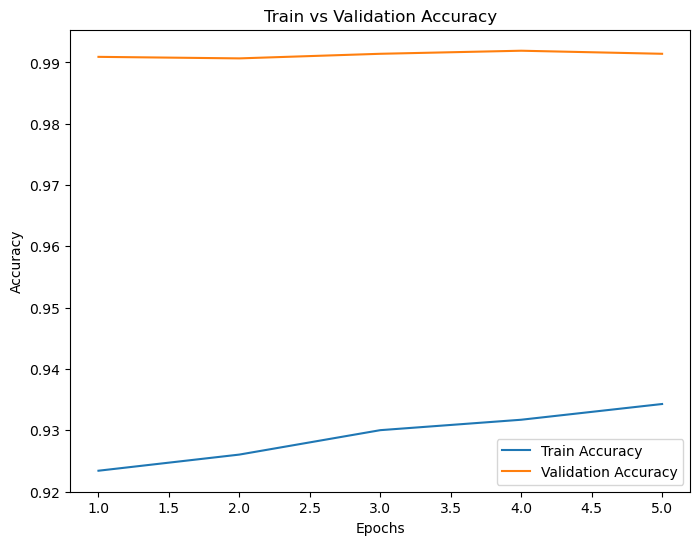

In [84]:
# Valid

def plot_accuracy(model_history_vnew):
    train_acc = model_history_vnew.history['accuracy']
    val_acc = model_history_vnew.history['val_accuracy']
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(model_history_vnew)

### FINAL TABLE FOR COMPARATE TWO NEURAL NETWORKS

In [88]:
final_table = PrettyTable()

final_table.field_names = ["Accuracy", "Loss"]

final_table.add_row(["0.912", "0.241"])
final_table.add_row(["0.991", "0.029"])

print(final_table)

+----------+-------+
| Accuracy |  Loss |
+----------+-------+
|  0.912   | 0.241 |
|  0.991   | 0.029 |
+----------+-------+
